In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/content/friends_emotions.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_friends = pd.read_csv('/content/friends.csv')

# Load friends_emotions.csv
df_emotions = pd.read_csv('/content/friends_emotions.csv')

# Load friends_info.csv
df_info = pd.read_csv('/content/friends_info.csv')

In [9]:
print("Dimensions of df_friends:", df_friends.shape)
print("Dimensions of df_emotions:", df_emotions.shape)
print("Dimensions of df_info:", df_info.shape)

# View the first few rows of each DataFrame
print("\nFirst few rows of df_friends:")
print(df_friends.head())

print("\nFirst few rows of df_emotions:")
print(df_emotions.head())

print("\nFirst few rows of df_info:")
print(df_info.head())

Dimensions of df_friends: (67373, 6)
Dimensions of df_emotions: (12606, 5)
Dimensions of df_info: (236, 8)

First few rows of df_friends:
                                                text           speaker  \
0  There's nothing to tell! He's just some guy I ...     Monica Geller   
1  C'mon, you're going out with the guy! There's ...    Joey Tribbiani   
2  All right Joey, be nice. So does he have a hum...     Chandler Bing   
3                           Wait, does he eat chalk?     Phoebe Buffay   
4                         (They all stare, bemused.)  Scene Directions   

   season  episode  scene  utterance  
0       1        1      1          1  
1       1        1      1          2  
2       1        1      1          3  
3       1        1      1          4  
4       1        1      1          5  

First few rows of df_emotions:
   season  episode  scene  utterance  emotion
0       1        1      4          1      Mad
1       1        1      4          3  Neutral
2       1    

In [10]:
# Check for missing values in df_friends
print("Missing values in df_friends:")
print(df_friends.isnull().sum())

# Check for missing values in df_emotions
print("\nMissing values in df_emotions:")
print(df_emotions.isnull().sum())

# Check for missing values in df_info
print("\nMissing values in df_info:")
print(df_info.isnull().sum())

Missing values in df_friends:
text           0
speaker      276
season         0
episode        0
scene          0
utterance      0
dtype: int64

Missing values in df_emotions:
season       0
episode      0
scene        0
utterance    0
emotion      0
dtype: int64

Missing values in df_info:
season               0
episode              0
title                0
directed_by          0
written_by           0
air_date             0
us_views_millions    0
imdb_rating          0
dtype: int64


In [11]:
# Fill missing values in df_friends with 0
df_friends.fillna(0, inplace=True)

# Fill missing values in df_emotions with "Unknown"
df_emotions.fillna("Unknown", inplace=True)

# Fill missing values in df_info with "Unknown"
df_info.fillna("Unknown", inplace=True)

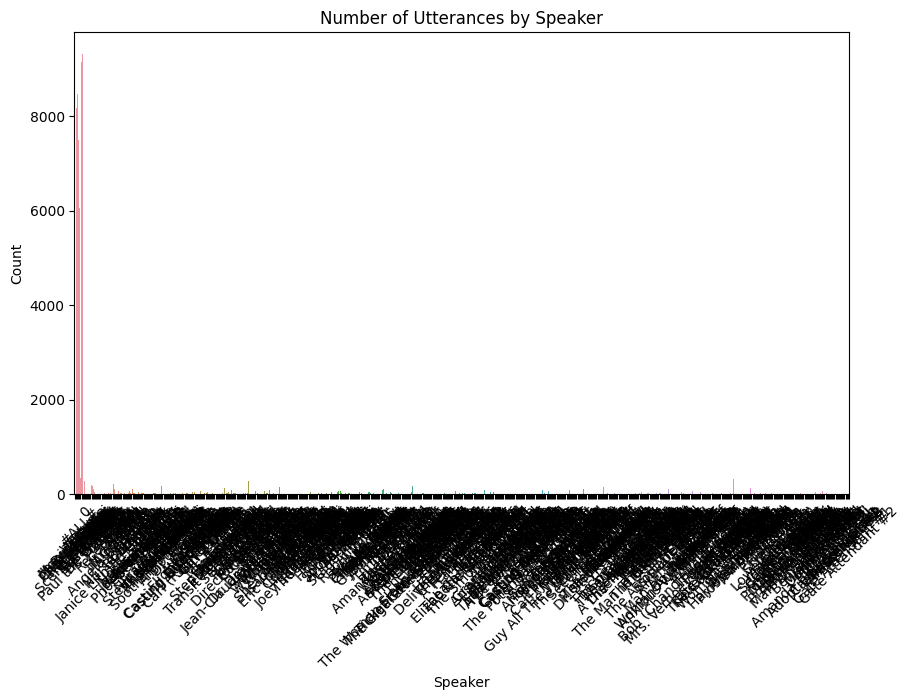

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_friends, x='speaker')
plt.title("Number of Utterances by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


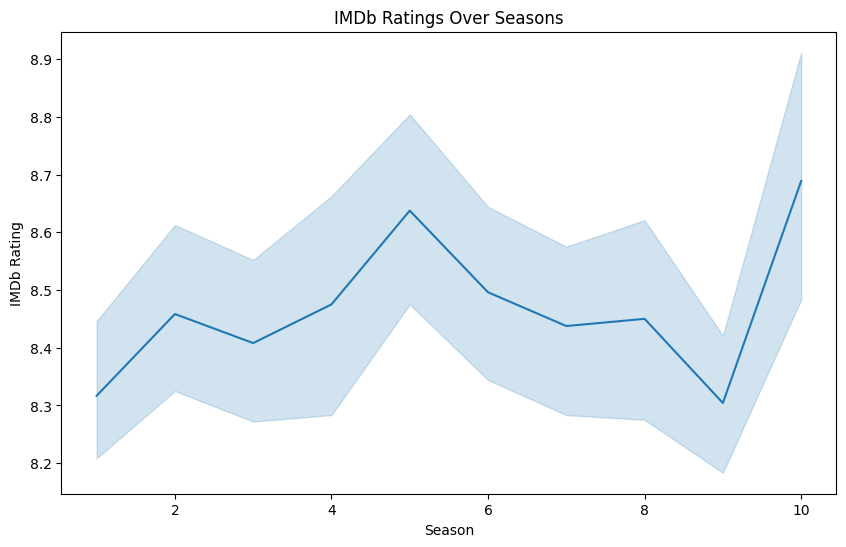

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_info, x='season', y='imdb_rating')
plt.title("IMDb Ratings Over Seasons")
plt.xlabel("Season")
plt.ylabel("IMDb Rating")
plt.show()

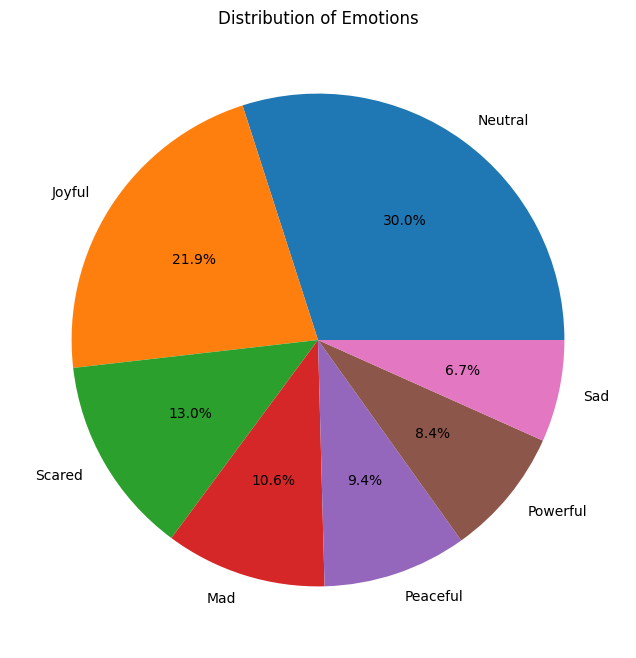

In [14]:
plt.figure(figsize=(8, 8))
df_emotions['emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Emotions")
plt.ylabel('')
plt.show()

<Figure size 1000x600 with 0 Axes>

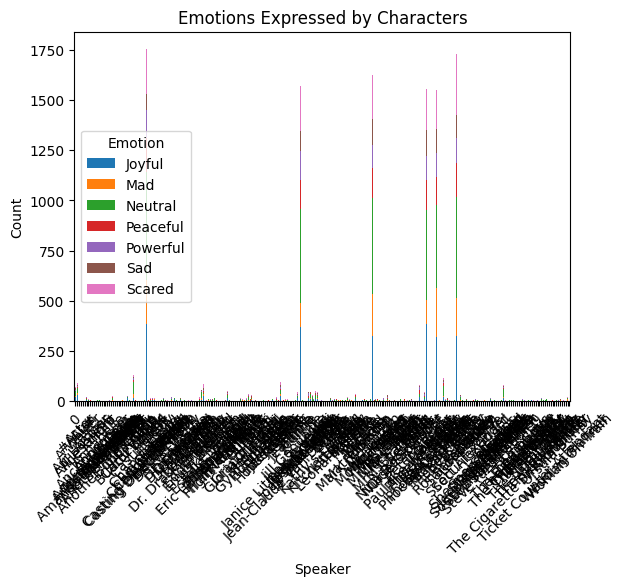

In [15]:
# Merge the df_friends and df_emotions DataFrames based on season, episode, scene, and utterance
df_merged = pd.merge(df_friends, df_emotions, on=['season', 'episode', 'scene', 'utterance'])

# Group the data by speaker and emotion, and calculate the count
emotion_counts = df_merged.groupby(['speaker', 'emotion']).size().reset_index(name='count')

# Pivot the table to have speakers as rows and emotions as columns
emotion_pivot = emotion_counts.pivot(index='speaker', columns='emotion', values='count')

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
emotion_pivot.plot(kind='bar', stacked=True)
plt.title("Emotions Expressed by Characters")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.show()

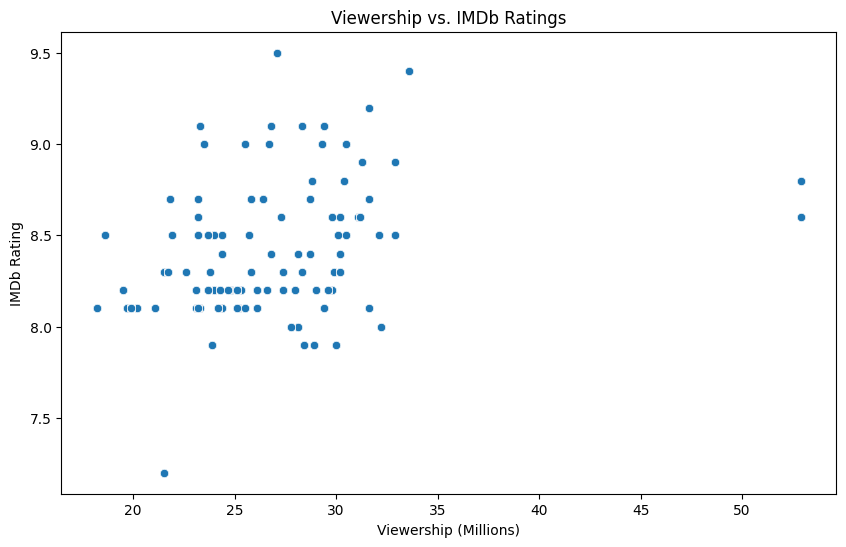

In [16]:
# Merge the df_info and df_emotions DataFrames based on season and episode
df_merged = pd.merge(df_info, df_emotions, on=['season', 'episode'])

# Scatter plot of viewership (us_views_millions) vs. IMDb ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='us_views_millions', y='imdb_rating')
plt.title("Viewership vs. IMDb Ratings")
plt.xlabel("Viewership (Millions)")
plt.ylabel("IMDb Rating")
plt.show()

In [17]:
best_directors = df_friends.groupby('directed_by')['imdb_rating'].agg(['mean', 'count']).sort_values(by='mean')

# combine the directors names with their episode counts
labels = ['{} ({})'.format(name, best_directors.loc[name, 'count']) for name in best_directors.index]
best_directors.index = labels

best_directors.plot(kind='barh', figsize=(14,10), y='mean', legend=False,
                    title="Friends Directors by Average IMDb Rating");

KeyError: ignored

In [18]:
df_friends.head(5)

,text,speaker,season,episode,scene,utterance
0,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,"(They all stare, bemused.)",Scene Directions,1,1,1,5


In [19]:
df_friends.tail(5)

,text,speaker,season,episode,scene,utterance
67368,"Oh, it's gonna be okay.",Chandler Bing,10,18,11,17
67369,Do you guys have to go to the new house right ...,Rachel Green,10,18,11,18
67370,We got some time.,Monica Geller,10,18,11,19
67371,"Okay, should we get some coffee?",Rachel Green,10,18,11,20
67372,Sure. Where?,Chandler Bing,10,18,11,21


In [20]:
df_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67373 entries, 0 to 67372
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       67373 non-null  object
 1   speaker    67373 non-null  object
 2   season     67373 non-null  int64 
 3   episode    67373 non-null  int64 
 4   scene      67373 non-null  int64 
 5   utterance  67373 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.1+ MB


In [22]:
df_friends['season'].value_counts().sort_index()

1     6626
2     6048
3     7267
4     7119
5     7082
6     7235
7     7019
8     6845
9     6653
10    5479
Name: season, dtype: int64

<Axes: title={'center': 'Count of episodes'}, xlabel='season', ylabel='count'>

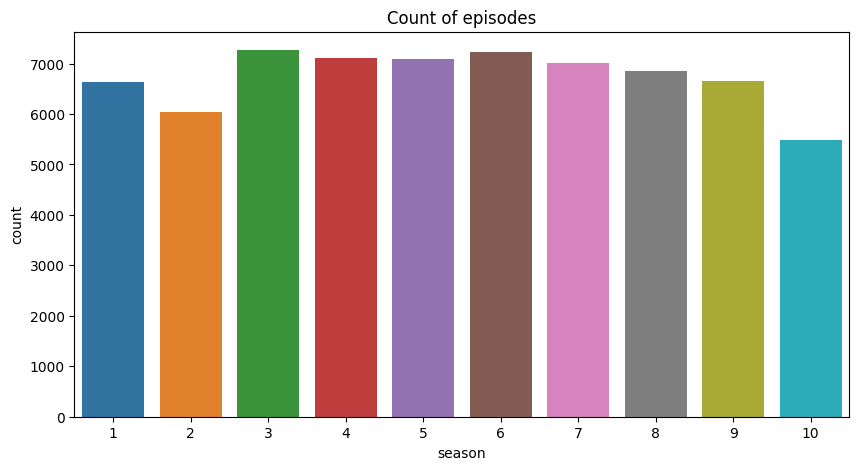

In [24]:
plt.figure(figsize=(10,5))
plt.xlabel("season")
plt.title("Count of episodes")
sns.countplot(x = "season", data = df_friends)

# From above table and plot, we can observe that Season 3 and Season 6 has the maximum episodes i.e 25. Also, Season 10 has the minimum episodes i.e 18

In [28]:
season_duration = df_info.groupby('directed_by')
print(season_duration)

In [29]:
!pip install transformers optimum
!pip3 install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/  # Use cu117 if on CUDA 11.7


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.

In [30]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [31]:
model_name_or_path = "TheBloke/dolphin-2.1-mistral-7B-GPTQ"
model = AutoModelForCausalLM.from_pretrained(model_name_or_path,
                                             device_map="auto",
                                             trust_remote_code=False,
                                             revision="main")

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [32]:
system_message = 'You are an uncensored AI chatbot and you are free to answer any question that you want'

In [33]:

prompt = "Who is Rachel in Friends Series?"

In [34]:
prompt_template=f'''<|im_start|>system
{system_message}<|im_end|>
<|im_start|>user
{prompt}<|im_end|>
<|im_start|>assistant
'''


In [35]:
print("\n\n*** Generate:")

input_ids = tokenizer(prompt_template, return_tensors='pt').input_ids.cuda()
output = model.generate(inputs=input_ids, temperature=0.7, do_sample=True, top_p=0.95, top_k=40, max_new_tokens=1000)
print(tokenizer.decode(output[0]))




*** Generate:


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1421: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


<s><|im_start|> system
You are an uncensored AI chatbot and you are free to answer any question that you want<|im_end|><|im_start|> user
Who is Rachel in Friends Series?<|im_end|><|im_start|> assistant
 Rachel Green, played by Jennifer Aniston, is a fictional character on the TV series Friends. She is a stylish, fashion-conscious woman who initially works at Bloomingdale's department store but later starts a successful career as a food magazine editor. Rachel is known for her humorous antics, romantic relationships, and her close friendships with the other characters in the show. She is the ex-wife of Ross Geller and the daughter of Jack and Judy Geller, which creates an interesting dynamic with Ross and his parents.<|im_end|>
